## Supervised -> Regression and Classification
## Unsupervised -> Clustering and Association

**Regression** - Ex, predictions

**Classification** - Ex, classifying apples and oranges from a fruit basket

**Clustering** - Ex, clustering similar objects with similar data points

**Association** - Recommendation Systems

## Imp. Algos
Supervised
- Naive-Bayes
- Decison Trees
- K-Nearest Neighbors(KNN)
- Support Vector Machines (SVM)
- Random Forest Algorithm

Unsupervised
- K-Means Clustering
- Gaussian Mixture Models
- Neural Networks
- Biclustering
- Density Estimation

In [2]:
import sklearn
import numpy as np
import pandas as pd

In [3]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('datasets/housing.csv', delimiter=r"\s+", names=cols)
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
df.isna().sum() #counts number of NaN in each column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### We have 505 rows of data. So we split data for training and testing (70+30)

In [4]:
from sklearn.model_selection import train_test_split # pretty self-explanatory import
X = np.array(df.iloc[:,0:13]) # first 13 columns, From X, data will be splitted 70-30
Y = np.array(df['MEDV']) # last column, From Y, data will be splitted 70-30
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=5) #0.30 is 30%

### Importing KNN algo

In [49]:
from sklearn.neighbors import KNeighborsRegressor

#loading model
Nn=KNeighborsRegressor(3) #values of k=3

### Model Fitting

In [51]:
Nn.fit(x_train, y_train) #with this one line, the model has learnt everything
# X-train -> input
# Y-train -> output
# <---model learns--->
# X-test -> input given
# Y-test -> output (which is supposed to come)
# Y-pred ->output given (by the model after learning)

KNeighborsRegressor(n_neighbors=3)

### Model Eval

In [52]:
prediction = Nn.predict(x_test)

### But there's no way for us to know whether we have assumed the right k value. This is where HYPERPARAMETER TUNING comes into the picture. Using the for loop we try with 50 diff. k values and see which one has low error rate

In [57]:
for i in range(1,50):
    model = KNeighborsRegressor(i)
    model.fit(x_train, y_train) # x-train, y-train given to study
    y_pred = model.predict(x_test) # x-test given to predict output
    error = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False) # y-test expected ouput for corresponding x-test
                                                                              # y_pred predcited by model, thus giving error
    print(str(error) + ' error for k=' + str(i))

7.97154478854566 error for k=1
7.159484875618533 error for k=2
7.014927171138291 error for k=3
7.004019640065342 error for k=4
7.036131375752027 error for k=5
7.103650686103268 error for k=6
7.249246229196143 error for k=7
7.278466403768686 error for k=8
7.490296733721186 error for k=9
7.573928228851226 error for k=10
7.580880154071545 error for k=11
7.620709624858009 error for k=12
7.702433441773159 error for k=13
7.745706188130712 error for k=14
7.855546909761407 error for k=15
7.970845764140948 error for k=16
8.00708692880329 error for k=17
8.05951400020052 error for k=18
8.105972848197592 error for k=19
8.171623447622684 error for k=20
8.208766061680672 error for k=21
8.266010100575647 error for k=22
8.280897264278922 error for k=23
8.326448746059764 error for k=24
8.38105978099617 error for k=25
8.410954693047014 error for k=26
8.478704509976565 error for k=27
8.50999986845734 error for k=28
8.538275555508479 error for k=29
8.57421797961705 error for k=30
8.599468444172452 error f

### So the best k=value is 4 with least error

In [70]:
final_NN = KNeighborsRegressor(4)
final_NN.fit(x_train, y_train) # x-train, y-train given to study
y_pred = final_NN.predict(x_test) # x-test given to predict output
error = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False) # y-test expected ouput for corresponding x-test
                                                                              # y_pred predcited by model, thus giving error
print(str(error) + ' error for k=' + str(4))

7.004019640065342 error for k=4


### So the model has learnt, fitted, optimized and evaluated. Now to check for results. y_pred has results given by the model based on x_test after learning x_train and y_train whereas y_test has the **actual** output

In [82]:
print('Predicted output from y_pred:' + '<----->' + 'Actual output from y_test')
for i in range(0,153):
    print('{:.4f}'.format(y_pred[i]) + '<----->' + '{:.4f}'.format(y_test[i]))

Predicted output from y_pred:<----->Actual output from y_test
31.4500<----->37.6000
35.1500<----->27.9000
23.6250<----->22.6000
11.1500<----->13.8000
30.0500<----->35.2000
15.4500<----->10.4000
21.5500<----->23.9000
33.9000<----->29.0000
18.8250<----->22.8000
22.6000<----->23.2000
22.8500<----->33.2000
27.4250<----->19.0000
20.1000<----->20.3000
30.0000<----->36.1000
31.8750<----->24.4000
19.0750<----->17.2000
10.3750<----->17.9000
20.9250<----->19.6000
21.5750<----->19.7000
10.4250<----->15.0000
18.2750<----->8.1000
18.0250<----->23.0000
37.6750<----->44.8000
20.2500<----->23.1000
24.5250<----->32.2000
14.1000<----->10.8000
23.4000<----->23.1000
18.2750<----->21.2000
24.0750<----->22.2000
33.8000<----->24.1000
19.0500<----->17.3000
16.9500<----->7.0000
12.4250<----->12.7000
17.5750<----->17.8000
28.4250<----->26.4000
18.1000<----->19.6000
29.5500<----->25.1000
12.6000<----->8.3000
41.4000<----->48.8000
31.9250<----->34.9000
15.4750<----->13.8000
16.8750<----->14.4000
22.0250<----->30.

IndexError: index 152 is out of bounds for axis 0 with size 152

In [83]:
np.mean((y_pred-y_test) ** 2) # root mean square of error

49.05629111842104

## We have a 49.05 mean error for our model, which makes sense cuz we literally took a K-value with 7.0040 as error rate. We had already taken the best k-value, but still there's a lot of diff. between the predicted value and the actual test value. So what's the problem?

## -->Its the MODEL. Yep, KNN is not the right model for this problem statement.
### Lets try the same with Linear Regression

In [86]:
from sklearn import linear_model

#load model
linear_model = linear_model.LinearRegression()

#we've already fitted our data 70-30. Let's use that
linear_model.fit(x_train, y_train)
linear_y_pred = linear_model.predict(x_test)

#lets compare values
print('Predicted output from linear_y_pred:' + '<----->' + 'Actual output from y_test')
for i in range(0,153):
    print('{:.4f}'.format(linear_y_pred[i]) + '<----->' + '{:.4f}'.format(y_test[i]))

Predicted output from linear_y_pred:<----->Actual output from y_test
37.3900<----->37.6000
31.5679<----->27.9000
27.1337<----->22.6000
6.5512<----->13.8000
33.6931<----->35.2000
5.5492<----->10.4000
27.1001<----->23.9000
29.8298<----->29.0000
26.4462<----->22.8000
22.3887<----->23.2000
32.2474<----->33.2000
21.7489<----->19.0000
23.4237<----->20.3000
33.5797<----->36.1000
28.3145<----->24.4000
15.3650<----->17.2000
0.1701<----->17.9000
18.7086<----->19.6000
14.6046<----->19.7000
10.8026<----->15.0000
3.1855<----->8.1000
19.3925<----->23.0000
38.3324<----->44.8000
24.4046<----->23.1000
31.9995<----->32.2000
11.3520<----->10.8000
24.9229<----->23.1000
23.3921<----->21.2000
22.7507<----->22.2000
21.0958<----->24.1000
16.1230<----->17.3000
7.5354<----->7.0000
17.5980<----->12.7000
22.8221<----->17.8000
29.2679<----->26.4000
18.8053<----->19.6000
28.3367<----->25.1000
8.6047<----->8.3000
41.6323<----->48.8000
34.1975<----->34.9000
20.1177<----->13.8000
4.3099<----->14.4000
29.6111<----->30.

IndexError: index 152 is out of bounds for axis 0 with size 152

In [87]:
np.mean((linear_y_pred-y_test) ** 2)

30.697037704088633

### Better than 49.05

**In this case, Linear Regression is better than KNN but we can improve that too by using better models**

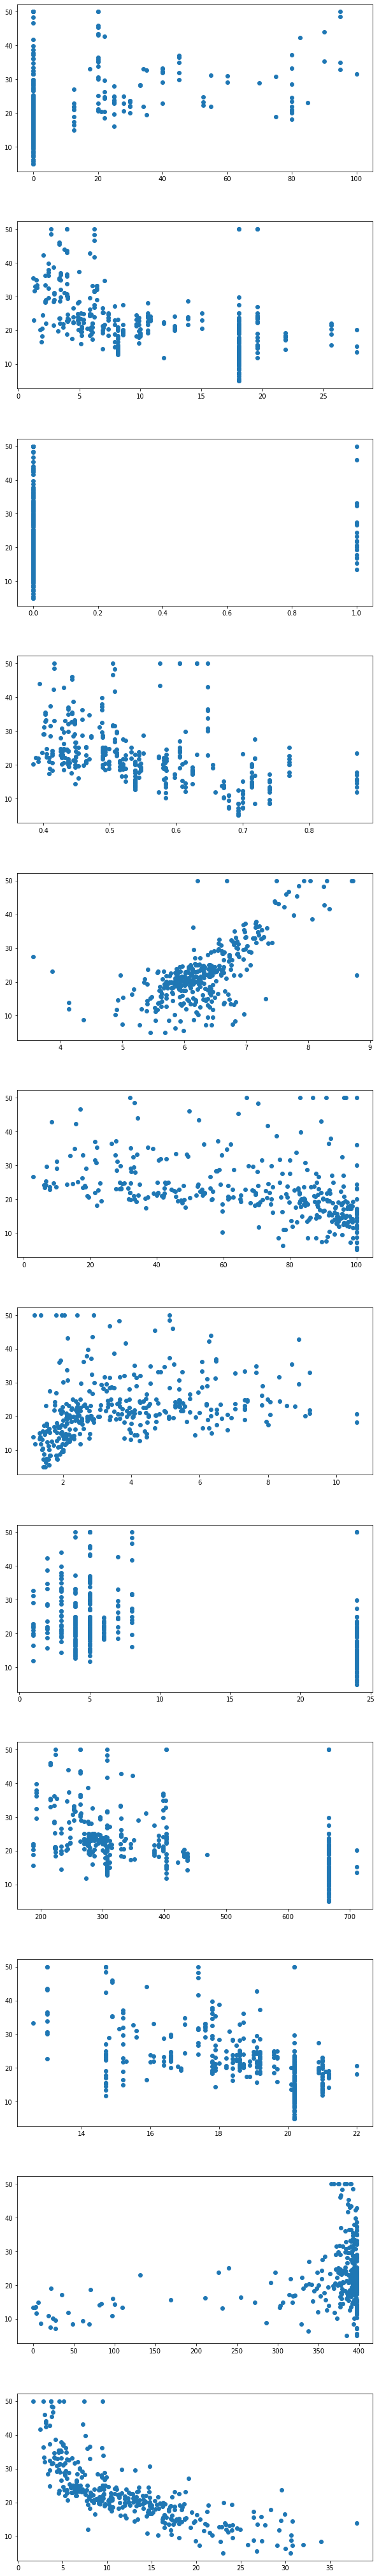

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 80))
for i in range(1,13):
    plt.subplot(13,1,i)
    plt.scatter(x_train[:,i], y_train)   
    plt.subplots_adjust(hspace=0.3)
